## Inference for means from 2 normal populations 

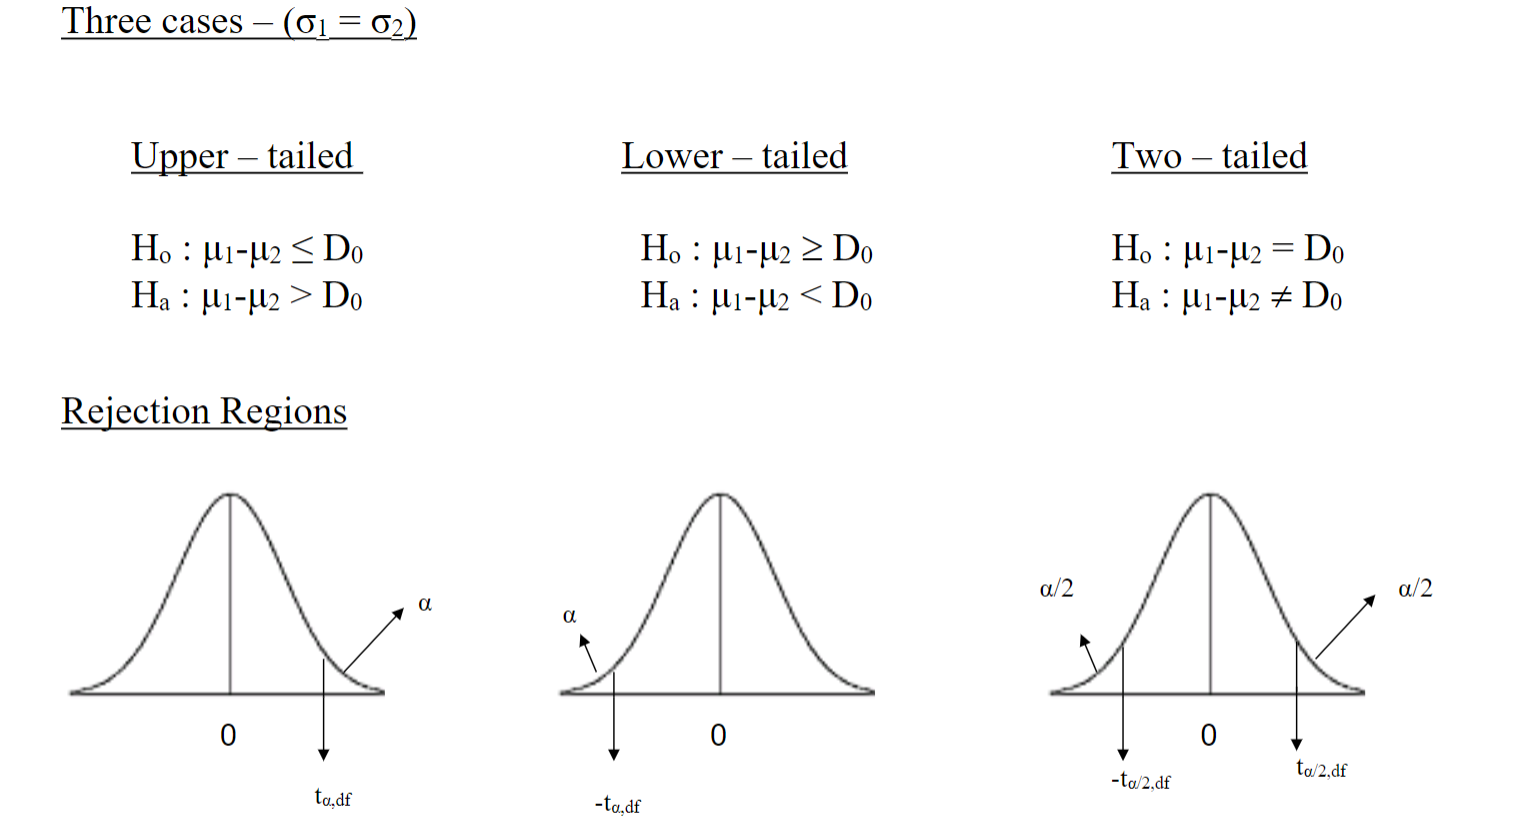

In [1]:
a = '1 2 4 5 8'
b = '4 3 9 10 9'

In [2]:
def to_array(a):
    val = []
    for i in a.split(' '):
        val.append(float(i))
    return val

In [3]:
a = to_array(a)
b = to_array(b)

In [4]:
import statistics as stat

In [5]:
y1 = stat.mean(a)
y2 = stat.mean(b)
s1 = stat.stdev(a)
s2 = stat.stdev(b)
n1 = 5
n2 = 5
s1, s2

(2.7386127875258306, 3.24037034920393)

#### Assume that the weights gains are normal, sample independent and variance is equal for 2 groups.
#### To validate this assumption we have a test statistic

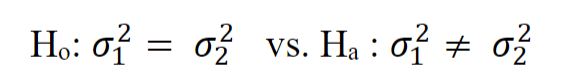

In [6]:
f = s2 ** 2 / s1 ** 2  # interchange if s1 > s2
f

1.4

In [7]:
from scipy.stats import f
import scipy
import math

alpha = 0.05
# Remember to change dfn and dfd based on what is numerator and denominator
dfn = n1 - 1  # 1 - length of the array
dfd = n2 - 1  # 1 - length of the array
scipy.stats.f.ppf(1 - alpha/2, dfn, dfd)

9.60452988472286

#### If null hypo has not been rejected

In [8]:
n1 = len(a)
n2 = len(b)

In [9]:
t1 = (n1 - 1) * s1 ** 2
t2 = (n2 - 1) * s2 ** 2
sp = math.sqrt((t1+t2) / (n1 + n2 - 2))
sp

3.0

In [10]:
t3 = math.sqrt((1/n1) + (1/n2))
t = (y1 - y2) / (sp * t3)
t

-1.5811388300841898

In [11]:
# (1 -) Depends on lower or upper tailed, this is currently lower tailed
alpha = 1 - 0.1
from scipy.stats import t
t.ppf(1 - alpha, (n1 + n2 - 2))

-1.396815309743419

#### Confidence Interval

In [12]:
alpha = 0.1
n1 = 25
n2 = 11
y1 = 205
y2 = 135
s1 = 100
s2 = 95

In [13]:
t1 = (n1 - 1) * s1 ** 2
t2 = (n2 - 1) * s2 ** 2
sp = math.sqrt((t1+t2) / (n1 + n2 - 2))
sp

98.55574713895506

In [14]:
t1 = y1 - y2
t2 = t.ppf(1 - (alpha/2), (n1 + n2 - 2))
t3 = sp * math.sqrt((1/n1) + (1/n2))
lcl = t1 - (t2 * t3)
hcl = t1 + (t2 * t3)

In [15]:
lcl, hcl

(9.70365172158462, 130.2963482784154)

#### If null hypo has been rejected

In [16]:
y1 = 4.09
y2 = 3.01
v1 = 0.227
v2 = 0.030
alpha = 0.05
n1 = 8
n2 = 8

In [17]:
f = v1 / v2  # interchange if s1 > s2
f

7.566666666666667

In [18]:
from scipy.stats import f
import scipy
import math

alpha = 0.05
dfn = n1 - 1  # 1 - length of the array
dfd = n2 - 1  # 1 - length of the array
scipy.stats.f.ppf(1 - alpha/2, dfn, dfd)

4.994909219063238

In [19]:
c = (v1 / n1) / ((v1/n1) + (v2/n2))
c

0.8832684824902723

In [20]:
t1 = (n1-1) * (n2 -1)
t2 = (n2-1) * (c ** 2)
t3 = (n1-1) * ((1 - c) ** 2)
df = t1 / (t2 + t3)
df

8.81845924965191

In [21]:
t1 = y1 - y2 # check this value should y2 - y1
t2 = math.sqrt((v1/n1) + (v2/n2)) # if std given replace v1 with s1 ** 2
t = t1 / t2
t

6.025626208638044

In [22]:
from scipy.stats import t
t.ppf(1 - (alpha/2), df) # 2 tailed test as given in question

2.269275992516224

## Paired Samples

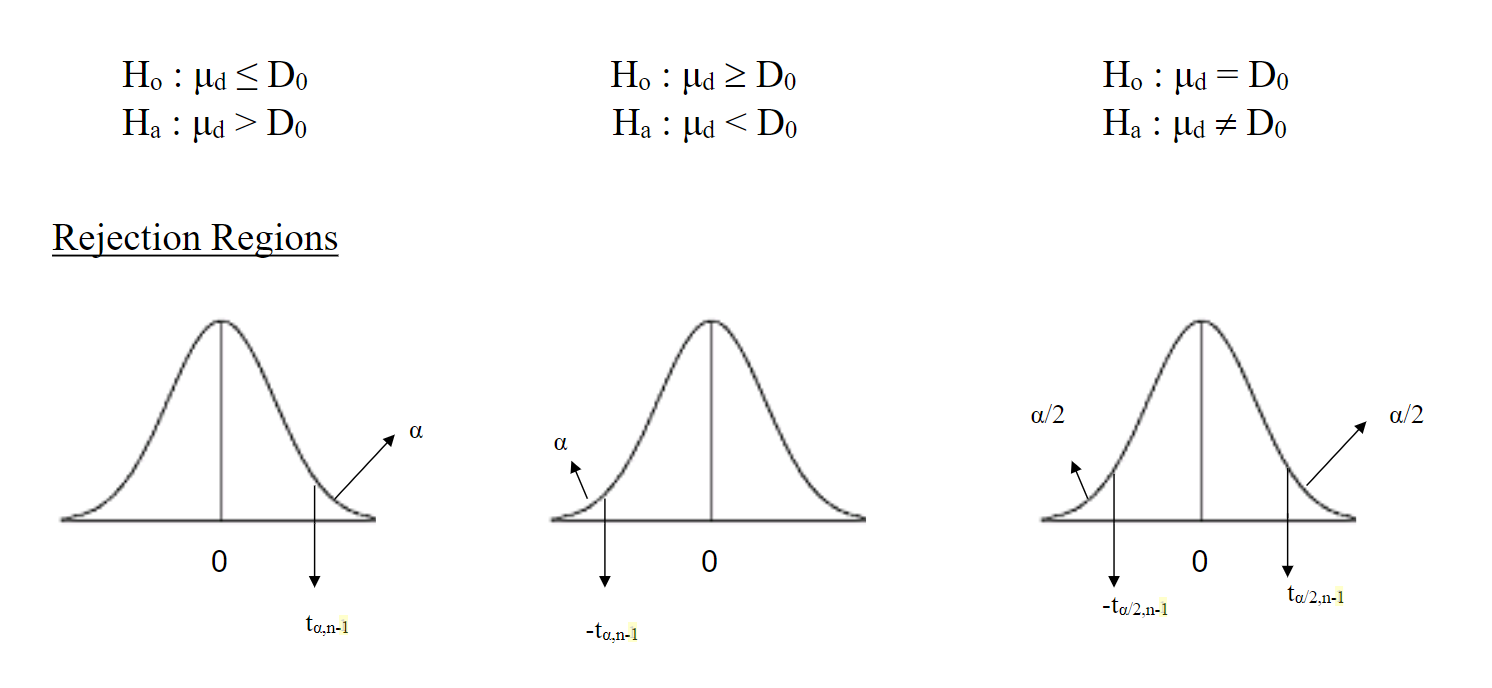

In [64]:
a = '10 15 20 19 9 11'
b = '12 16 19 22 9 12'
n1 = 6
n2 = 6
alpha = 0.05

In [65]:
a = to_array(a)
b = to_array(b)

In [51]:
import numpy as np
a = np.array(a)
b = np.array(b)

In [52]:
d = b - a
d2 = d ** 2
d, d2

(array([ 2.,  1., -1.,  3.,  0.,  1.]), array([4., 1., 1., 9., 0., 1.]))

In [53]:
dmean = stat.mean(d)
sd = math.sqrt(sum((d - dmean) ** 2) / (n1-1))
sd

1.4142135623730951

In [55]:
t = dmean / (sd / math.sqrt(n1))
t

1.732050807568877

In [57]:
from scipy.stats import t
t.ppf(1 - (alpha), n1-1)

2.015048372669157

#### Confidence Interval

In [86]:
a = '2.92 1.88 5.35 3.81 4.69 4.86 5.81 5.55'
b = '1.84 0.95 4.26 3.18 3.44 3.69 4.95 4.47'
n1 = 8
n2 = 8
alpha = 0.05

In [87]:
a = to_array(a)
b = to_array(b)

In [88]:
a = np.array(a)
b = np.array(b)

In [89]:
d = a - b
d2 = d ** 2
d, d2

(array([1.08, 0.93, 1.09, 0.63, 1.25, 1.17, 0.86, 1.08]),
 array([1.1664, 0.8649, 1.1881, 0.3969, 1.5625, 1.3689, 0.7396, 1.1664]))

In [90]:
dmean = np.mean(d)
dmean = stat.mean(d)
sd = math.sqrt(sum((d - dmean) ** 2) / (n1-1))
sd

0.19737111526983178

In [97]:
from scipy.stats import t
t1 = t.ppf(1 - (alpha/2), n1-1)

In [98]:
lcl = dmean - (t1 * (sd /math.sqrt(n1)))
hcl = dmean + (t1 * (sd /math.sqrt(n1)))
lcl, hcl

(0.8462436183496778, 1.1762563816503222)